In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [2]:
# Dataset directory
train_dir = "C:\\Users\\aaron\\OneDrive\\Documents\\Studies\\AI\\deep-learning\\Dataset\\Train"
val_dir = "C:\\Users\\aaron\\OneDrive\\Documents\\Studies\\AI\\deep-learning\\Dataset\\Valid"
test_dir = "C:\\Users\\aaron\\OneDrive\\Documents\\Studies\\AI\\deep-learning\\Dataset\\Test"

# Model parameters
num_classes = 4  # Specify the number of classes in your dataset
input_shape = (224, 224, 3)  # Input shape expected by DenseNet121

# Training parameters
batch_size = 20
epochs = 50
learning_rate = 0.001

In [3]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [4]:
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model (fix the deprecation warning here)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Define checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Define TensorBoard callback (optional, set the log_dir)
tensorboard = TensorBoard(log_dir='logs')

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Train the model without early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard]
)


Epoch 1/50
140/140 [==============================] - 169s 929ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0898 - val_accuracy: 0.9817
Epoch 2/50
140/140 [==============================] - 120s 856ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.1973 - val_accuracy: 0.9467
Epoch 3/50
140/140 [==============================] - 118s 840ms/step - loss: 0.0521 - accuracy: 0.9821 - val_loss: 0.9359 - val_accuracy: 0.8200
Epoch 4/50
140/140 [==============================] - 105s 748ms/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.2833 - val_accuracy: 0.9317
Epoch 5/50
140/140 [==============================] - 114s 816ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.1364 - val_accuracy: 0.9633
Epoch 6/50
140/140 [==============================] - 119s 847ms/step - loss: 0.0169 - accuracy: 0.9932 - val_loss: 0.0828 - val_accuracy: 0.9800
Epoch 7/50
140/140 [==============================] - 118s 838ms/step - loss: 0.0129 - accuracy: 0.9946 - val_loss: 0.1748 -

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


C:\Users\User\anaconda3\envs\py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
175/175 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.7296   
Epoch 1: val_accuracy improved from -inf to 0.98833, saving model to best_densenet121_model.h5
175/175 [==============================] - 90s 431ms/step - loss: 0.7057 - accuracy: 0.7296 - val_loss: 0.0639 - val_accuracy: 0.9883 - lr: 1.0000e-04
Epoch 2/50
175/175 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.9118  
Epoch 2: val_accuracy improved from 0.98833 to 0.99167, saving model to best_densenet121_model.h5
175/175 [==============================] - 62s 351ms/step - loss: 0.2520 - accuracy: 0.9118 - val_loss: 0.0278 - val_accuracy: 0.9917 - lr: 1.0000e-04
Epoch 3/50
175/175 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9346  
Epoch 3: val_accuracy improved from 0.99167 to 0.99333, saving model to best_densenet1

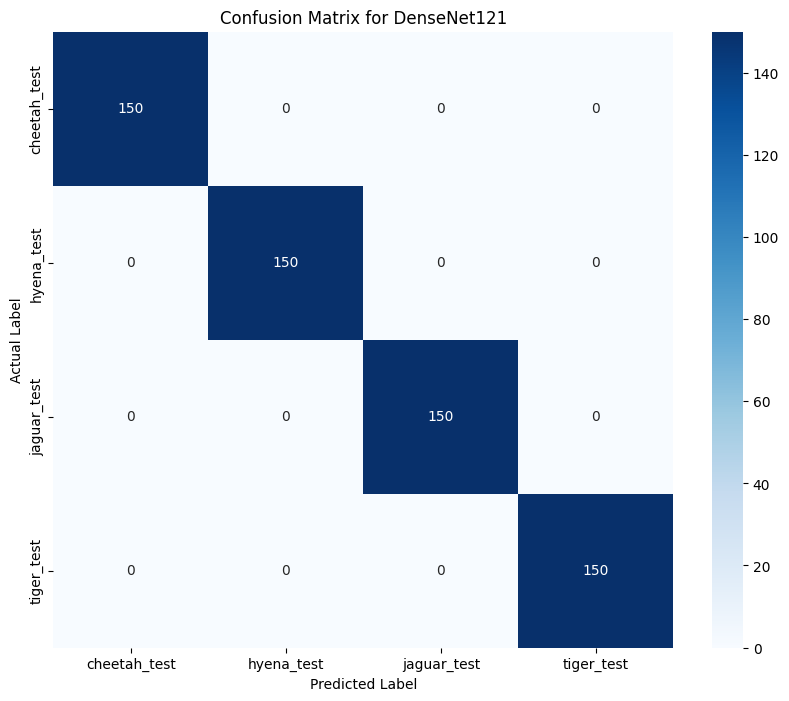

Classification Report for DenseNet121
              precision    recall  f1-score   support

cheetah_test       1.00      1.00      1.00       150
  hyena_test       1.00      1.00      1.00       150
 jaguar_test       1.00      1.00      1.00       150
  tiger_test       1.00      1.00      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



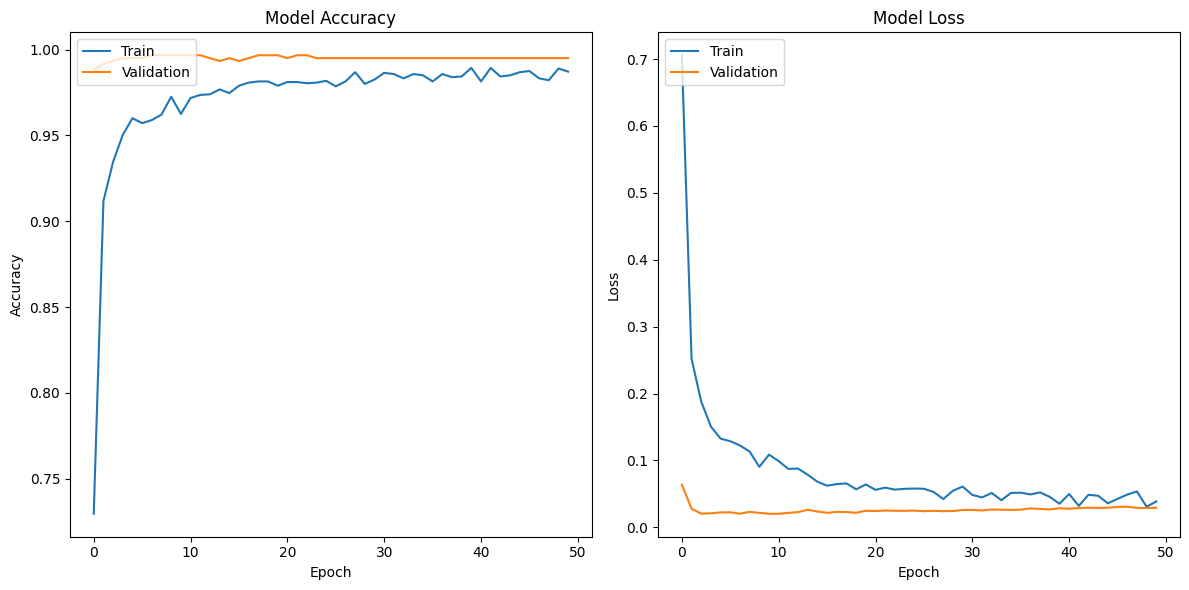

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
import time

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 16  # Reduced for better gradient updates

# Define paths
train_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Train"
val_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Valid"
test_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Test"

# Enhanced data generators with stronger augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Enhanced custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.6)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers of base model for fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile with lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Enhanced callbacks
checkpoint = ModelCheckpoint('best_densenet121_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1)

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, reduce_lr]
)
training_time = time.time() - start_time

# Load the best model
model = tf.keras.models.load_model('best_densenet121_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")
print(f"Training Time: {training_time} seconds")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for DenseNet121')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for DenseNet121')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()